# Project Title: Weather Prediction for Tomorrow Using Ridge Regression.

### By: Abhishek Patil


In [ ]:
import pandas as pd

# Loading the Data:

In [ ]:
weather = pd.read_csv("/content/weather.csv", index_col = "DATE")
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Looking for the total number of null values in each column:

In [ ]:
no_null_values = weather.apply(pd.isnull).sum()
no_null_values

STATION        0
NAME           0
ACMH        9672
ACSH        9671
AWND        5116
FMTM        9163
PGTM        7018
PRCP           0
SNOW           0
SNWD           2
TAVG       13123
TMAX           0
TMIN           0
TSUN       19256
WDF1        9676
WDF2        9618
WDF5        9701
WDFG       14166
WDFM       19286
WESD       13216
WSF1        9673
WSF2        9618
WSF5        9702
WSFG       11824
WSFM       19286
WT01       12155
WT02       18034
WT03       18000
WT04       18951
WT05       18923
WT06       19106
WT07       19179
WT08       15371
WT09       19147
WT11       19273
WT13       17102
WT14       18400
WT15       19245
WT16       12710
WT17       19227
WT18       18120
WT21       19282
WT22       19238
WV01       19286
dtype: int64

In [ ]:
null_pct = no_null_values/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
weather = weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21


# Now lets forward fill the missing values in the new DataFrame:

In [ ]:
weather = weather.ffill()

In [ ]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [ ]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [ ]:
weather.index = pd.to_datetime(weather.index)

In [ ]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

# Lets check for the gaps in our data:

In [ ]:
weather.index.year.value_counts()

1996    366
2016    366
2004    366
1992    366
2008    366
1988    366
2012    366
2000    366
1980    366
1984    366
2020    366
1972    366
1976    366
2017    365
2002    365
2003    365
2005    365
2006    365
2021    365
2007    365
2009    365
2015    365
2019    365
2010    365
2011    365
2018    365
2013    365
2014    365
2001    365
1970    365
1999    365
1985    365
1973    365
1974    365
1975    365
1977    365
1978    365
1979    365
1981    365
1982    365
1983    365
1986    365
1998    365
1987    365
1989    365
1990    365
1991    365
1993    365
1994    365
1995    365
1971    365
1997    365
2022    294
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

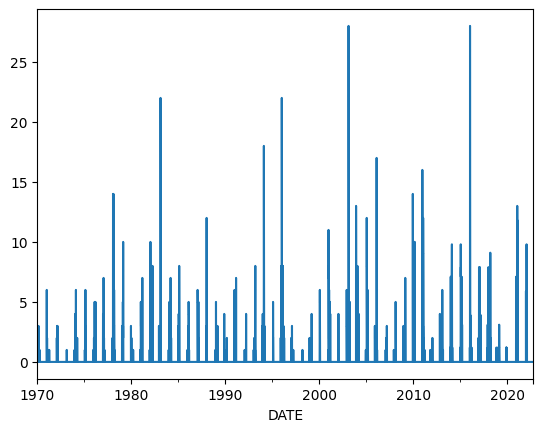

In [ ]:
weather["snwd"].plot()

In [ ]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21


## tmax is the maximum temperature in Fahrenheit for that day.

## tmin is the minimun temperature for that day.

## We are going to predict the tmax for the next day.


In [ ]:
weather["target"] = weather.shift(-1)["tmax"]

In [ ]:
weather.tail()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,NaN


In [ ]:
weather = weather.ffill()
weather.tail()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,64.0


In [ ]:
weather.corr()

<ipython-input-24-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,prcp,snow,snwd,tmax,tmin,target
prcp,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
snow,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
snwd,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
tmax,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
tmin,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


# Now lets implement our Machine Learning Model:

## Ridge Regression Model:
### a)We are going to apply ridge regression model which works very similar to linear regression model except it penalizes coefficients to account for multi-collinearity. So, Ridge Regression to some extent helps adjust for collinearity.

### b)There is a parameter called lambda in ridge regression, here(alpha = 0.1) this parameter controls how much the coefficients are shrunk to account for collinearity.

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 0.1)

In [ ]:
predictors = weather.columns[~ weather.columns.isin(["target", "name", "station"])]

In [ ]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

## Note:

we have time series data, so we can not use cross validation to measure the error and the performance of the model with different dataset. So with time series we have to do backtesting. In time series we cannot use the future data to predict the present.

In [ ]:
def backtest(weather, model, predictors, start = 3650, step = 90):
  all_predictions = []

  for i in range(start, weather.shape[0], step):
    train = weather.iloc[:i,:]
    test = weather.iloc[i:(i+step),:]

    model.fit(train[predictors], train["target"])

    preds = model.predict(test[predictors])

    preds = pd.Series(preds, index = test.index)

    combined = pd.concat([test["target"], preds], axis =1)

    combined.columns = ["actuals", "predictions"]

    combined["diff"] = (combined["predictions"] - combined["actuals"]).abs()

    all_predictions.append(combined)

  return pd.concat(all_predictions)




In [ ]:
predictions = backtest(weather, rr, predictors)

In [ ]:
predictions

,actuals,predictions,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


## Let Check the performance of our model:

a) Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(predictions["actuals"], predictions["predictions"])

5.139326679660841

b) R-Squared

In [ ]:
from sklearn.metrics import r2_score

r2_score(predictions["actuals"], predictions["predictions"])

0.8567116644976441

# Now lets improve the perfromance of our model:

### We are going to improve our accuracy by calculating the avg temp and percepitation in the past few days and looking at the current day compared to those days.

### New Predictor Columns:

### pct_diff() Function:

It just calculates the simple percent change between the previous values and the new value.

### compute_rolling() Function:

1)It takes in the DataFrame, Horizon and col parameters. Then it creates the name of the column in label variable using horizon and the col.

2) Then label gets added to weather DataFrame as a new column where the rolling average are being calculated for the specific column for different horizon

3) then the creates another column where it call pct_diff() function  where it calculates the percent change in the value for today and for the rolling parameter or rolling mean.

### A) we are going to caluclate the simple moving averages of 3 days and 14 days for the tmax, tmin and prcp columns.

### B) We are going to calculate the difference between the simple moving averages and the value of that specific day for that specific column.

In [ ]:
def pct_diff(old,new):
  return (new - old) / old

def compute_rolling(weather, horizon, col):
  label = f"rolling_{horizon}_{col}"

  weather[label] = weather[col].rolling(horizon).mean()

  weather[f"{label}_pct"] = pct_diff(weather[label],weather[col])

  return weather

rolling_horizon = [3,14]

for horizon in rolling_horizon:
  for col in ["tmax", "tmin", "prcp"]:
    weather = compute_rolling(weather, horizon, col)


In [ ]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0,32.333333,0.175258,23.000000,0.086957,0.006667,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0,33.333333,-0.070000,23.333333,-0.014286,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0,34.666667,0.009615,23.000000,-0.086957,0.006667,-1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather = weather.iloc[14:,:]

In [ ]:
weather = weather.fillna(0)

### New Predictor Column:

### expand_mean( ) Function:

#### This Function take the DataFrame as input and it is going to lokk at the each row of the DataFrame and then take all the previous rows and return the mean of all those rows

### A) we are going find the average monthly temperature for all the months that are previuosly gone in our dataset.

Example: It will go through the Data group it by month all the jan will be together, all feb will be together etc then it is going through the groups and find the mean of all the jan dates before the specific date. if date is 10-01-2000 then it will calculate the mean for all the jan dates from 1970 to 2000(before 10-01-2000).

### B) we are going to do the same thing as above but not we are just going to calculate the mean for the days of the year.

Example: It is joing to take the day of the year meaning days from 1 to 365 in a year. if we take a date 10-01-2000, it is going to calculate the mean of all the values 10th day from 1970 to 2000 and return the mean.  

In [ ]:
# This Function take the DataFrame as input and it is going to lokk at the each row of the DataFrame and then take all the previous rows and return the mean of all those rows
def  expand_mean(df):
  return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
  weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys = False).apply(expand_mean)
  weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)


In [ ]:
weather.tail()

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,...,50.785714,0.063291,0.233571,-0.657492,64.843462,63.490566,50.225905,48.962264,0.115316,0.114151
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,...,50.857143,-0.056180,0.135000,-1.000000,64.839264,63.962264,50.224540,48.943396,0.115245,0.077170
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,50.000000,-0.140000,0.095714,-1.000000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547
2022-10-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,61,44,64.0,58.333333,0.045714,...,49.428571,-0.109827,0.095714,-1.000000,64.831495,62.660377,50.216299,48.471698,0.115104,0.193962
2022-10-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,64,43,64.0,60.333333,0.060773,...,48.500000,-0.113402,0.095714,-1.000000,64.830986,63.471698,50.211880,47.867925,0.115034,0.079057


In [ ]:
new_predictors = weather.columns[~ weather.columns.isin(["target", "name", "station"])]

In [ ]:
new_predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

# Now lets implement the ML model using the new predictors

In [ ]:
predictions = backtest(weather, rr, new_predictors)

# Now lets check the Performance of our Model:

A) Mean Absolute Error

In [ ]:
mean_absolute_error(predictions["actuals"], predictions["predictions"])

4.792510527138958

B) R-Squared

In [ ]:
r2_score(predictions["actuals"], predictions["predictions"])

0.8747016857483911

# **Results:**

We improved the preformance of our model and the accuracy of our prediction by adding the new_predictors:

A) we reduced our mean squared error for 5.14 to 4.7

B) We improved our R-Squared from 85.6 % to 87.5 %